<a href="https://colab.research.google.com/github/naylorstone/DS3001-Final-Project/blob/main/ds3001_group_project_EDA_%E2%80%94_lot_area%2C_overall_quality%2C_overall_condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# import data
df = pd.read_csv("./sample_data/train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# rename columns

df.rename(columns={'OverallQual': 'Overall_Quality'}, inplace=True)
df.rename(columns={'OverallCond': 'Overall_Condition'}, inplace=True)

In [5]:
# desciptive stats for lot area correlated with salesprice
df.loc[:,['LotArea', 'SalePrice']].groupby('LotArea').describe()


SalePrice                                                       \
            count      mean          std       min       25%       50%   
LotArea                                                                  
1300          1.0  124000.0          NaN  124000.0  124000.0  124000.0   
1477          1.0   80000.0          NaN   80000.0   80000.0   80000.0   
1491          1.0   75500.0          NaN   75500.0   75500.0   75500.0   
1526          1.0   86000.0          NaN   86000.0   86000.0   86000.0   
1533          2.0   94500.0  3535.533906   92000.0   93250.0   94500.0   
...           ...       ...          ...       ...       ...       ...   
70761         1.0  280000.0          NaN  280000.0  280000.0  280000.0   
115149        1.0  302000.0          NaN  302000.0  302000.0  302000.0   
159000        1.0  277000.0          NaN  277000.0  277000.0  277000.0   
164660        1.0  228950.0          NaN  228950.0  228950.0  228950.0   
215245        1.0  375000.0          NaN  375000.0  375000.0  375000.0   

                             
              75%       max  
LotArea                      
1300     124000.0  124000.0  
1477      80000.0   80000.0  
1491      75500.0   75500.0  
1526      86000.0   86000.0  
1533      95750.0   97000.0  
...           ...       ...  
70761    280000.0  280000.0  
115149   302000.0  302000.0  
159000   277000.0  277000.0  
164660   228950.0  228950.0  
215245   375000.0  375000.0  

[1073 rows x 8 columns]

In [8]:
# desciptive stats for overall quality correlated with salesprice
df.loc[:,['Overall_Quality', 'SalePrice']].groupby('Overall_Quality').describe()

SalePrice                                                    \
                    count           mean            std       min       25%   
Overall_Quality                                                               
1                     2.0   50150.000000   15344.217152   39300.0   44725.0   
2                     3.0   51770.333333   14254.200796   35311.0   47655.5   
3                    20.0   87473.750000   24688.567399   37900.0   75500.0   
4                   116.0  108420.655172   29022.003886   34900.0   88000.0   
5                   397.0  133523.347607   27107.330927   55993.0  118000.0   
6                   374.0  161603.034759   36090.182933   76000.0  139125.0   
7                   319.0  207716.423197   44466.259414   82500.0  179470.0   
8                   168.0  274735.535714   63898.902253  122000.0  234557.5   
9                    43.0  367513.023256   81278.174849  239000.0  318980.5   
10                   18.0  438588.388889  159785.491058  160000.0  349375.0   

                                               
                      50%       75%       max  
Overall_Quality                                
1                 50150.0   55575.0   61000.0  
2                 60000.0   60000.0   60000.0  
3                 86250.0   97500.0  139600.0  
4                108000.0  125500.0  256000.0  
5                133000.0  147000.0  228950.0  
6                160000.0  181000.0  277000.0  
7                200141.0  230750.0  383970.0  
8                269750.0  306250.0  538000.0  
9                345000.0  389716.0  611657.0  
10               432390.0  472875.0  755000.0

In [9]:
# desciptive stats for overall condition correlated with salesprice
df.loc[:,['Overall_Condition', 'SalePrice']].groupby('Overall_Condition').describe()

SalePrice                                                    \
                      count           mean            std       min       25%   
Overall_Condition                                                               
1                       1.0   61000.000000            NaN   61000.0   61000.0   
2                       5.0  141986.400000  141342.813488   67000.0   76500.0   
3                      25.0  101929.400000   44852.490403   35311.0   76000.0   
4                      57.0  120438.438596   38922.525907   40000.0   92900.0   
5                     821.0  203146.914738   85117.319416   34900.0  144000.0   
6                     252.0  153961.591270   60737.969824   37900.0  124375.0   
7                     205.0  158145.487805   53468.189431   79900.0  123500.0   
8                      72.0  155651.736111   52375.144681   84500.0  125375.0   
9                      22.0  216004.545455   96485.974689  110500.0  143500.0   

                                                 
                        50%       75%       max  
Overall_Condition                                
1                   61000.0   61000.0   61000.0  
2                   85000.0   87000.0  394432.0  
3                   89500.0  135000.0  200624.0  
4                  115000.0  143000.0  235000.0  
5                  185000.0  239686.0  745000.0  
6                  142750.0  171875.0  755000.0  
7                  145000.0  178000.0  402000.0  
8                  142500.0  170750.0  335000.0  
9                  176200.0  287875.0  475000.0

###**Making some plots to further explore the data**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='LotArea'>

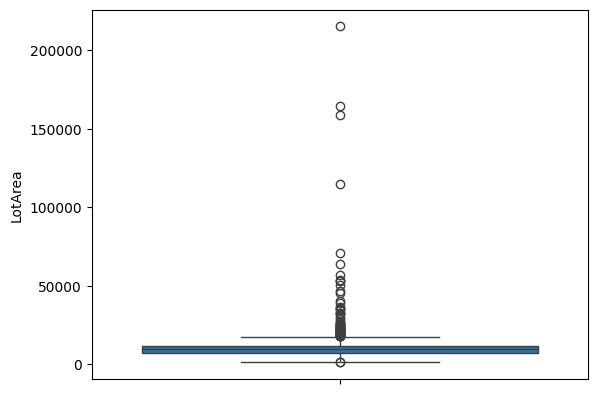

In [10]:
sns.boxplot(df['LotArea'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Overall_Quality'>

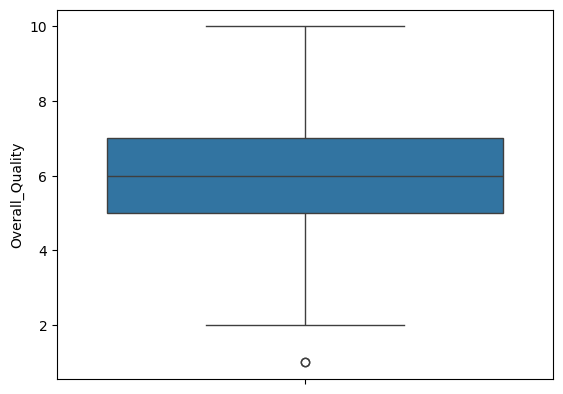

In [11]:
sns.boxplot(df['Overall_Quality'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Overall_Condition'>

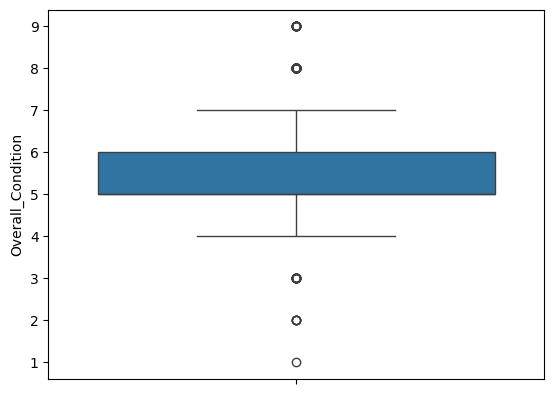

In [12]:
sns.boxplot(df['Overall_Condition'])

<Axes: xlabel='LotArea', ylabel='SalePrice'>

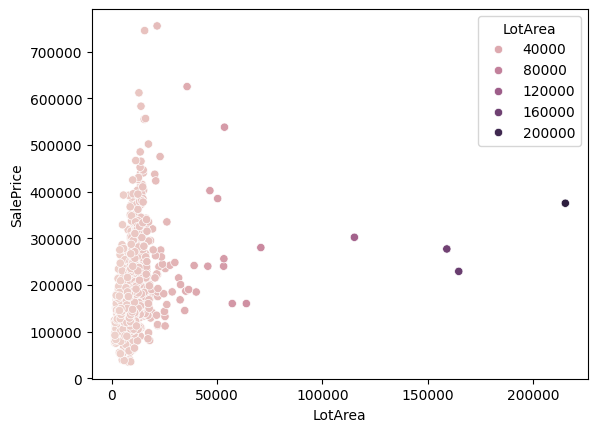

In [13]:
sns.scatterplot(data=df,x='LotArea',y='SalePrice', hue = 'LotArea')

<Axes: xlabel='Overall_Quality', ylabel='SalePrice'>

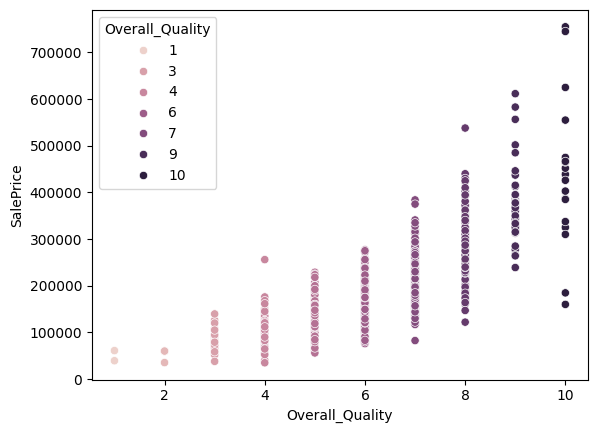

In [14]:
sns.scatterplot(data=df,x='Overall_Quality',y='SalePrice', hue = 'Overall_Quality')

<Axes: xlabel='Overall_Condition', ylabel='SalePrice'>

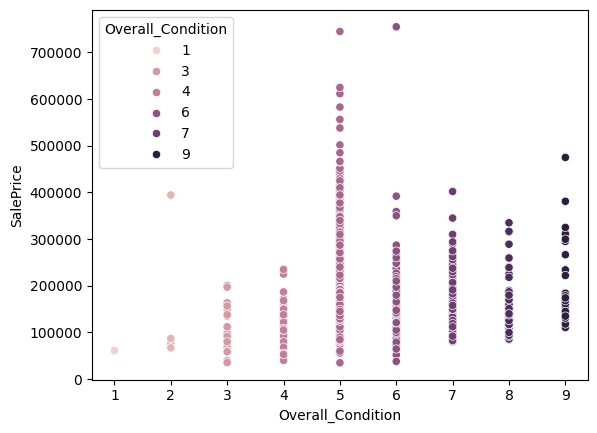

In [15]:
sns.scatterplot(data=df,x='Overall_Condition',y='SalePrice', hue = 'Overall_Condition')